In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time

Solving...
$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}=0,$$
where the boundary conditions are
$$V(x,y=0)=V_0\sin\left(2\pi \frac{x}{a}\right),$$
$$V(x,y=b)=0,$$
$$V(x=0,y)=0,$$
$$V(x=a,y)=0.$$

In [3]:
a=1.0
b=1.0
V0=1.0

dx=1.0/50

xmin=0
xmax=b
ymin=0
ymax=a

nx=int((xmax-xmin)/dx)
ny=int((ymax-ymin)/dx)

x0=np.linspace(xmin,xmax,nx+1)
y0=np.linspace(ymin,ymax,ny+1)

x,y=np.meshgrid(x0,y0)
print("dx=",dx)
print(x.shape)

dx= 0.02
(51, 51)


In [4]:
V=np.zeros_like(x)

In [5]:
V[:,0]=0 # x=0
V[:,-1]=0 # x=b
V[-1,:]=0 # y=a
for i in range(nx+1):
    V[0,i]=V0*np.sin(2 * np.pi * x0[i] / b)

In [6]:
# Tolerance for convergence
eps=1.0e-6

# Carry out the first round of the averaging scheme and calculate the residual
V1=np.copy(V) # a temporary array to store the updated values of V
V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:]) # carry out the average
resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
resid0=resid
V=np.copy(V1) # Put updated values into the array V

start=time.time()
it=0
while (resid/resid0>eps): # Loop criterion: we use relative residual here
    V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:])
    resid=np.sum(np.fabs(V1-V))
    V=np.copy(V1)
    it=it+1
end=time.time()
print("Number of iterations:",it)
print("The time spent is",end-start,"s")

Number of iterations: 2285
The time spent is 0.03999972343444824 s


## Plotting Numerical Solution

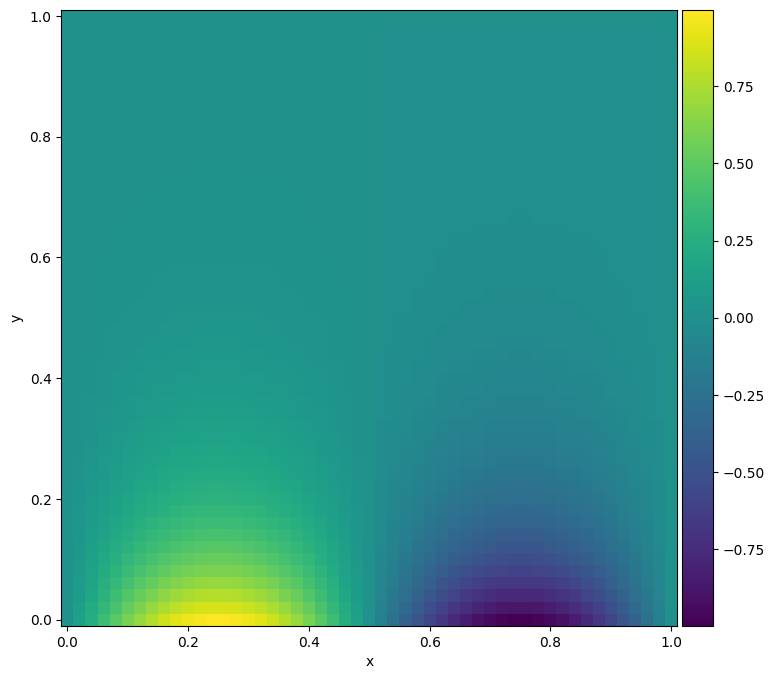

In [7]:
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(x,y,V)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

## Plotting Analytical Solution

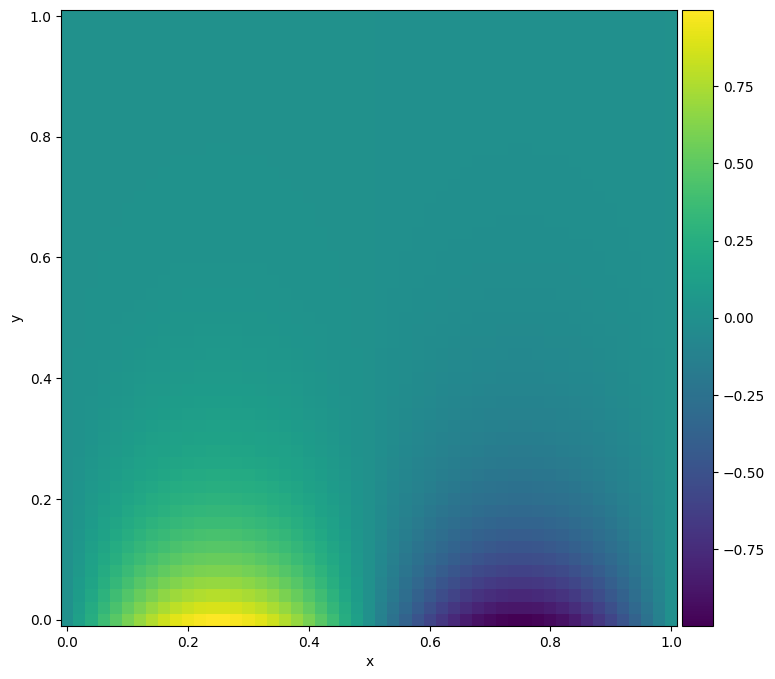

In [8]:
V_analytical=np.zeros_like(x)
for i in range(nx+1):
    for j in range(ny+1):
        V_analytical[i,j]=(V0/(1+np.exp((4*np.pi*b)/a)))*np.sin(2*np.pi*x0[j]/b)*(np.exp((2*np.pi*y0[i])/a) + np.exp((-2*np.pi*y0[i])/a) * np.exp((4*np.pi*b)/a))
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(x,y,V_analytical)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

## Plotting Difference Percent Difference in Analytical vs. Numerical

The sum of the error is: 0.0004417377395543737


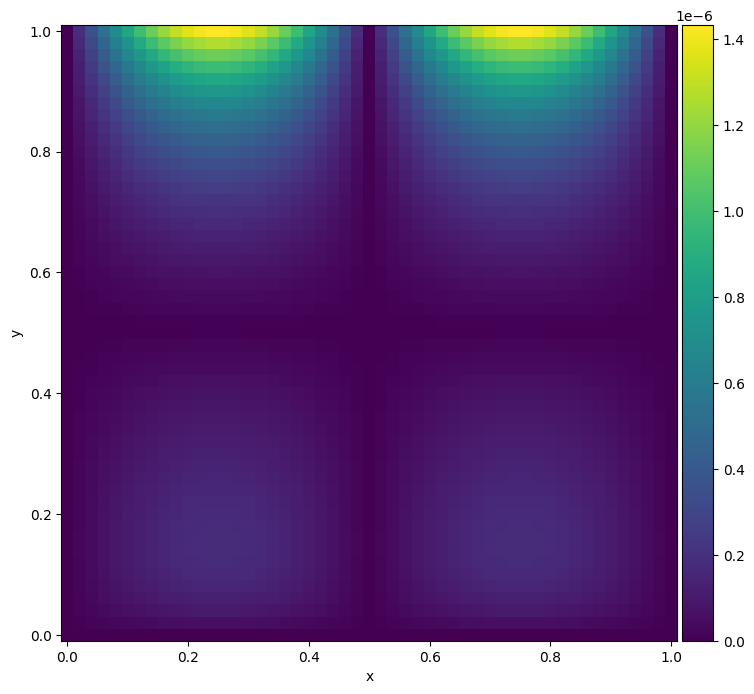

In [9]:
V_error= np.fabs(V-V_analytical)/np.size(V)
sum_error=np.sum(V_error)
print("The sum of the error is: " + str(sum_error))
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(x,y,V_error)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

## Plotting Error as a Function of eps

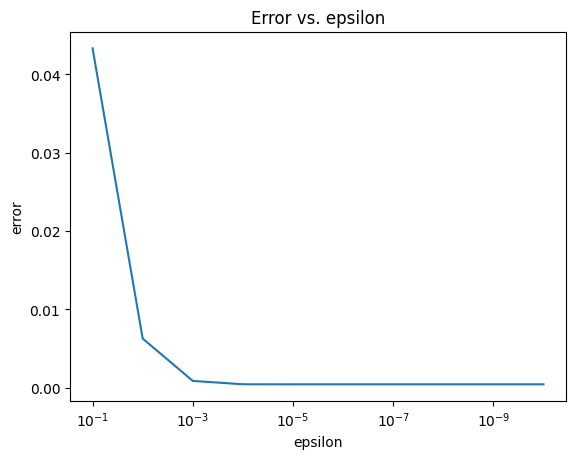

[0.04331403 0.00628333 0.00087781 0.00044736 0.00044153 0.00044174
 0.00044176 0.00044176 0.00044176 0.00044176]


In [10]:
eps_array=np.array([1.0e-1, 1.0e-2,1.0e-3,1.0e-4,1.0e-5,1.0e-6, 1.0e-7, 1.0e-8, 1.0e-9, 1.0e-10])
error_array=np.array([])

for epsilon in eps_array:
    V=np.zeros_like(x)
    V[:,0]=0 # x=0
    V[:,-1]=0 # x=b
    V[-1,:]=0 # y=a
    for i in range(nx+1):
        V[0,i]=V0*np.sin(2 * np.pi * x0[i] / b)
        
    V1=np.copy(V) # a temporary array to store the updated values of V
    V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:]) # carry out the average
    resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
    resid0=resid
    V=np.copy(V1) # Put updated values into the array V

    while (resid/resid0>epsilon): # Loop criterion: we use relative residual here
        V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:])
        resid=np.sum(np.fabs(V1-V))
        V=np.copy(V1)
        
    V_analytical=np.zeros_like(x)
    for i in range(nx+1):
        for j in range(ny+1):
            V_analytical[i,j]=(V0/(1+np.exp((4*np.pi*b)/a)))*np.sin(2*np.pi*x0[j]/b)*(np.exp((2*np.pi*y0[i])/a) + np.exp((-2*np.pi*y0[i])/a) * np.exp((4*np.pi*b)/a))

    
    V_error= np.fabs(V-V_analytical)
    sum_error=np.sum(V_error)/np.size(V_error)
    error_array=np.append(error_array,sum_error)
    
plt.semilogx(eps_array,error_array)
plt.gca().invert_xaxis()
plt.xlabel('epsilon')
plt.ylabel('error')
plt.title('Error vs. epsilon')
plt.show()

print (error_array)

## Ploting Error as a Function of Gridspacing

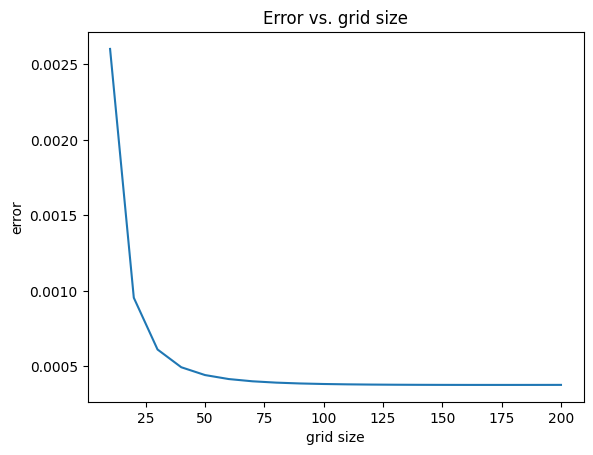

In [11]:
gridsizes = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
error_array=np.array([])

for grid_size in gridsizes:
    dx=1.0/grid_size

    xmin=0
    xmax=b
    ymin=0
    ymax=a

    nx=int((xmax-xmin)/dx)
    ny=int((ymax-ymin)/dx)

    x0=np.linspace(xmin,xmax,nx+1)
    y0=np.linspace(ymin,ymax,ny+1)

    x,y=np.meshgrid(x0,y0)
    
    V=np.zeros_like(x)
    V[:,0]=0 # x=0
    V[:,-1]=0 # x=b
    V[-1,:]=0 # y=a
    for i in range(nx+1):
        V[0,i]=V0*np.sin(2 * np.pi * x0[i] / b)
        
    V1=np.copy(V) # a temporary array to store the updated values of V
    V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:]) # carry out the average
    resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
    resid0=resid
    V=np.copy(V1) # Put updated values into the array V

    while (resid/resid0>eps): # Loop criterion: we use relative residual here
        V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:])
        resid=np.sum(np.fabs(V1-V))
        V=np.copy(V1)
        
    V_analytical=np.zeros_like(x)
    for i in range(nx+1):
        for j in range(ny+1):
            V_analytical[i,j]=(V0/(1+np.exp((4*np.pi*b)/a)))*np.sin(2*np.pi*x0[j]/b)*(np.exp((2*np.pi*y0[i])/a) + np.exp((-2*np.pi*y0[i])/a) * np.exp((4*np.pi*b)/a))

    
    V_error= np.fabs(V-V_analytical)
    sum_error=np.sum(V_error)/np.size(V_error)
    error_array=np.append(error_array,sum_error)
    
plt.plot(gridsizes,error_array)
plt.xlabel('grid size')
plt.ylabel('error')
plt.title('Error vs. grid size')
plt.show()
    


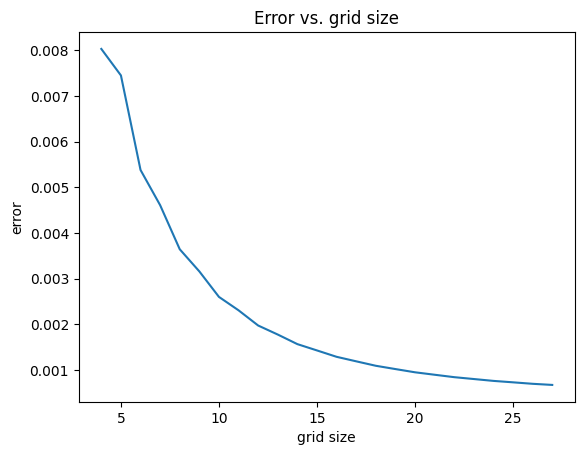

In [12]:
gridsizes = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])
error_array=np.array([])

for grid_size in gridsizes:
    dx=1.0/grid_size

    xmin=0
    xmax=b
    ymin=0
    ymax=a

    nx=int((xmax-xmin)/dx)
    ny=int((ymax-ymin)/dx)

    x0=np.linspace(xmin,xmax,nx+1)
    y0=np.linspace(ymin,ymax,ny+1)

    x,y=np.meshgrid(x0,y0)
    
    V=np.zeros_like(x)
    V[:,0]=0 # x=0
    V[:,-1]=0 # x=b
    V[-1,:]=0 # y=a
    for i in range(nx+1):
        V[0,i]=V0*np.sin(2 * np.pi * x0[i] / b)
        
    V1=np.copy(V) # a temporary array to store the updated values of V
    V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:]) # carry out the average
    resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
    resid0=resid
    V=np.copy(V1) # Put updated values into the array V

    while (resid/resid0>eps): # Loop criterion: we use relative residual here
        V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:])
        resid=np.sum(np.fabs(V1-V))
        V=np.copy(V1)
        
    V_analytical=np.zeros_like(x)
    for i in range(nx+1):
        for j in range(ny+1):
            V_analytical[i,j]=(V0/(1+np.exp((4*np.pi*b)/a)))*np.sin(2*np.pi*x0[j]/b)*(np.exp((2*np.pi*y0[i])/a) + np.exp((-2*np.pi*y0[i])/a) * np.exp((4*np.pi*b)/a))

    
    V_error= np.fabs(V-V_analytical)
    sum_error=np.sum(V_error)/np.size(V_error)  
    error_array=np.append(error_array,sum_error)
    
plt.plot(gridsizes,error_array)
plt.xlabel('grid size')
plt.ylabel('error')
plt.title('Error vs. grid size')
plt.show()

Solving...
$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}=0,$$
where the boundary conditions are
$$V(x,y=0)=V_0,$$
$$V(x,y=b)=0,$$
$$V(x=0,y)=0,$$
$$V(x=a,y)=0.$$

dx= 0.02
(51, 51)
Number of iterations: 5619
The time spent is 0.09335017204284668 s


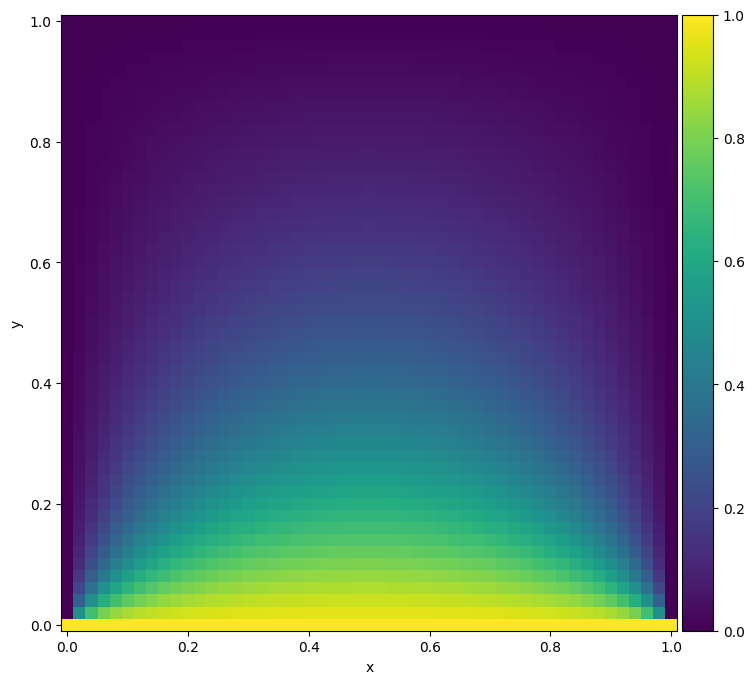

In [13]:
a=1.0
b=1.0
V0=1.0

dx=1.0/50

xmin=0
xmax=b
ymin=0
ymax=a

nx=int((xmax-xmin)/dx)
ny=int((ymax-ymin)/dx)

x0=np.linspace(xmin,xmax,nx+1)
y0=np.linspace(ymin,ymax,ny+1)

x,y=np.meshgrid(x0,y0)
print("dx=",dx)
print(x.shape)
V=np.zeros_like(x)
V[:,0]=0 # x=0
V[:,-1]=0 # x=b
V[-1,:]=0 # y=a
V[0,:]=V0 # y=0
# Tolerance for convergence
eps=1.0e-6

# Carry out the first round of the averaging scheme and calculate the residual
V1=np.copy(V) # a temporary array to store the updated values of V
V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:]) # carry out the average
resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
resid0=resid
V=np.copy(V1) # Put updated values into the array V

start=time.time()
it=0
while (resid/resid0>eps): # Loop criterion: we use relative residual here
    V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:])
    resid=np.sum(np.fabs(V1-V))
    V=np.copy(V1)
    it=it+1
end=time.time()
print("Number of iterations:",it)
print("The time spent is",end-start,"s")
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(x,y,V)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()